In [1]:
using JLD, FFTW, PyPlot, DSP, LinearAlgebra
using Statistics, StatsBase

In [2]:
push!(LOAD_PATH, ".")
push!(LOAD_PATH, "../FFTWandsuch/")

5-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "."
 "../FFTWandsuch/"

In [3]:
using FFTWtoolkit

In [4]:
arx="/home/karel/ElectroNeuroTools/JLDFiles/4AP/DatosLFP4APusadosPaper.jld"
bla=jldopen(arx)
lfp=read(bla["LFP"]);

In [5]:
freq=7022
nmax=size(lfp, 3)
tmax=nmax/freq

0.19965821703218456

In [6]:
sigma=zeros(64,64)
for j=1:64, k=1:64
    sigma[j,k]=std(lfp[j,k,:])
end

In [7]:
xxex=[45,58,33]
yyex=[55,45,30]

3-element Array{Int64,1}:
 55
 45
 30

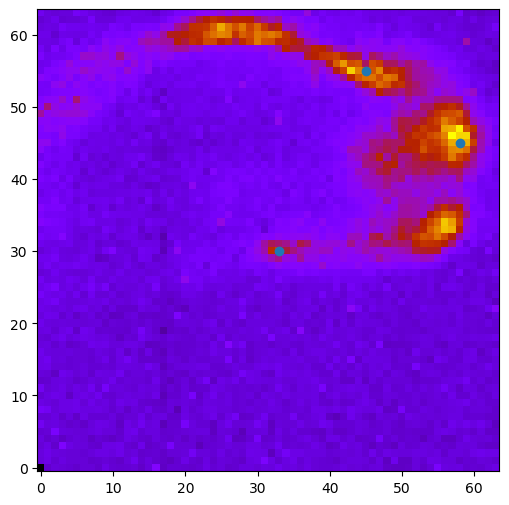

PyObject <matplotlib.collections.PathCollection object at 0x7f99ba4de950>

In [8]:
figure(figsize=(6,6))
imshow(sigma, origin="lower", cmap="gnuplot")
scatter(xxex,yyex)

In [9]:
lfpex=zeros(nmax,3)
k=1
for j in zip(xxex,yyex)
    print(j[2], " ", j[1] , " , ")
    lfpex[:,k]=lfp[j[2],j[1],:]
    k+=1
end

lfp1=lfpex[:,1];

55 45 , 45 58 , 30 33 , 

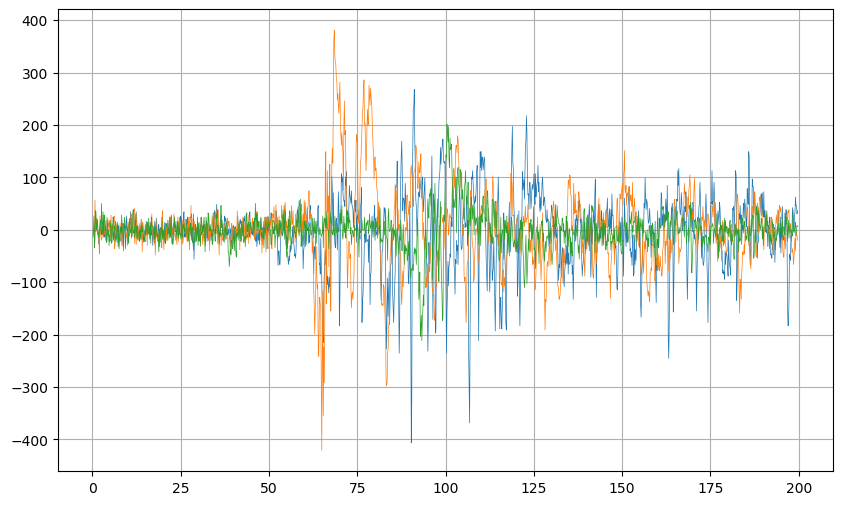

In [10]:
figure(figsize=(10,6))
tangoms=(1:nmax)./freq.*1000
for j in (1,2,3)
    plot(tangoms,lfpex[:,j],lw=0.5)
end
grid()

In [11]:
rango=1:nmax
rangotiempos=(rango.-1)./freq
rangofreqs=(rango.-1)./tmax
rfreqsim=map(x->-freq/2+(x-1)*freq/(nmax-1),rango);
rfreqsim[div(nmax,2)+1]

2.506067094932405

In [12]:
plan=plan_fft(lfpex[:,1]);
DSP.nextfastfft(1401, 7022)

(1440, 7056)

In [13]:
fexe=plan*lfpex[:,1];
fux=fft(lfpex[:,1]);
lfpexchaca=zeros(1440)
for j=1:nmax
    lfpexchaca[j]=lfpex[j,1]
end
fuxchaca=fft(lfpexchaca);

In [14]:
fexe[1:100]-fux[1:100]

100-element Array{Complex{Float64},1}:
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
     ⋮
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [15]:
poder=abs2.(fexe);
pudr=abs2.(fux);
purcha=abs2.(fuxchaca);

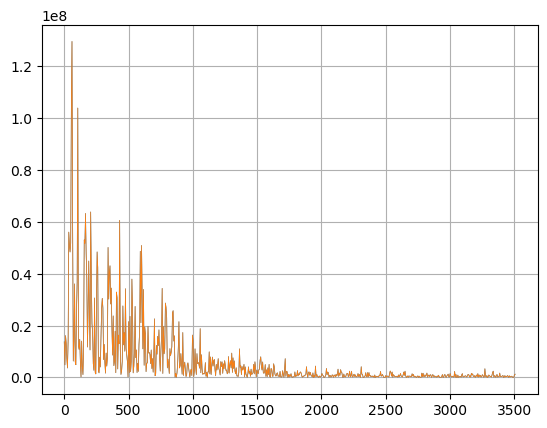

In [16]:

plot(rangofreqs[1:701], poder[1:701],lw=0.5)
p=plot(rangofreqs[1:701], pudr[1:701],lw=0.5)

grid()

In [17]:
p1=periodogram(lfpex[:,1], fs=freq)

DSP.Periodograms.Periodogram{Float64,AbstractFFTs.Frequencies{Float64}}([1.3936143861908799, 1.0043700831893119, 3.070447476064728, 3.1962197847219955, 1.0913170158065515, 1.0099656125714183, 1.8003969744200308, 10.583724261676238, 9.595690097467132, 12.939144717043815  …  0.01882033737458347, 0.09464263467069108, 0.08137421410080874, 0.0861158669409585, 0.011595725643231414, 0.001510231022779526, 0.04445755698632841, 0.23209439305387003, 0.2671322510282721, 0.0006927026926965086], [0.0, 4.876388888888889, 9.752777777777778, 14.629166666666666, 19.505555555555556, 24.381944444444446, 29.258333333333333, 34.13472222222222, 39.01111111111111, 43.8875  …  3467.1125, 3471.988888888889, 3476.865277777778, 3481.741666666667, 3486.6180555555557, 3491.4944444444445, 3496.3708333333334, 3501.2472222222223, 3506.123611111111, 3511.0])

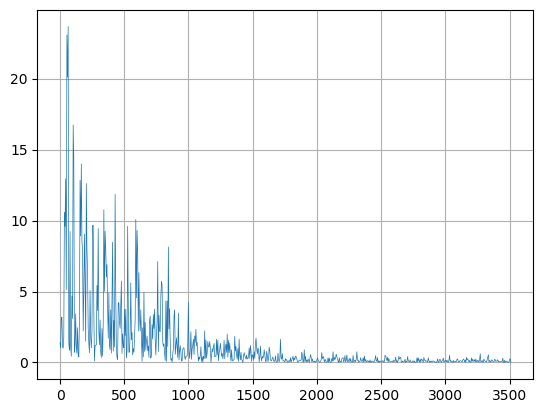

In [18]:
#figure(figsize=(10,5))


plot(p1.freq ,p1.power,lw=0.5)

#plot(p2.freq ,p2.power,lw=1)

#plot(p3.freq ,p3.power,lw=1)



grid()

In [19]:
ff=poder[2]/p1.power[2]

4.852187329133048e6

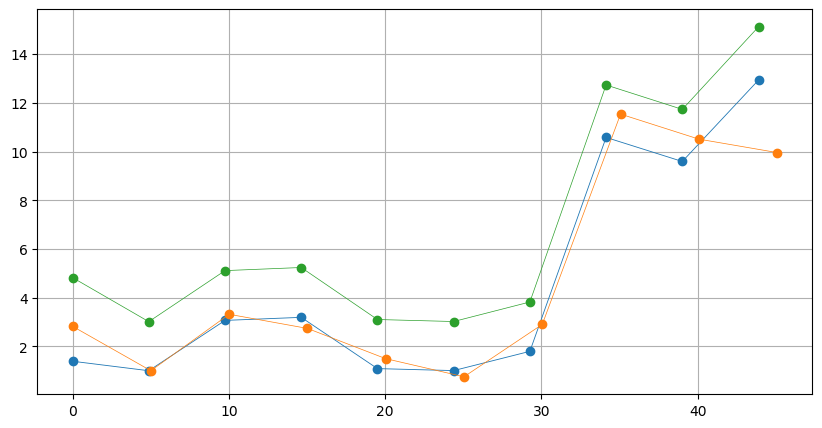

In [20]:
figure(figsize=(10,5))
unos=10
plot(p1.freq[1:unos], p1.power[1:unos], "o-", lw=0.6)
plot(rangofreqs[1:unos], poder[1:unos]./ff,"o-", lw=0.5)
plot(p1.freq[1:unos], purcha[1:unos]./ff.+2, "o-", lw=0.5)
grid()

In [21]:
ar=fft(lfp1)

1402-element Array{Complex{Float64},1}:
 -3704.0405273437495 - 3.410605131648481e-13im
   646.4710928880983 + 2110.7976969552415im
   2758.776114130329 - 2916.612825035076im
 -1912.4348273476971 + 3105.744193337846im
  -2423.167736596291 + 1185.8393205881152im
   1274.417799094149 - 1429.5153381214598im
   1835.477700655848 + 3276.282917607739im
  -6848.995599544651 - 3015.0278966036144im
   5781.279200934585 + 4194.19176572935im
 -6737.6444422763525 - 1714.8935708204133im
   -5187.95042559595 - 4984.883500575665im
   10192.65160638368 - 648.2782293605774im
 -11004.074356530415 - 2892.461222590493im
                     ⋮
 -11004.074356530415 + 2892.4612225904907im
   10192.65160638368 + 648.2782293605759im
  -5187.950425595949 + 4984.883500575665im
 -6737.6444422763525 + 1714.8935708204147im
   5781.279200934585 - 4194.191765729351im
  -6848.995599544649 + 3015.027896603614im
  1835.4777006558475 - 3276.2829176077385im
  1274.4177990941503 + 1429.515338121459im
 -2423.1677365962937 - 

In [22]:
?FFTW.rfftfreq

```
rfftfreq(n, fs=1)
```

Return the discrete Fourier transform (DFT) sample frequencies for a real DFT of length `n`. The returned `Frequencies` object is an `AbstractVector` containing the frequency bin centers at every sample point. `fs` is the sample rate of the input signal.


In [23]:
FFTW.rfftfreq(1401,7022)

701-element AbstractFFTs.Frequencies{Float64}:
    0.0
    5.0121341898643825
   10.024268379728765
   15.036402569593147
   20.04853675945753
   25.060670949321914
   30.072805139186293
   35.08493932905068
   40.09707351891506
   45.109207708779444
   50.12134189864383
   55.13347608850821
   60.14561027837259
    ⋮
 3453.3604568165597
 3458.372591006424
 3463.3847251962884
 3468.3968593861528
 3473.408993576017
 3478.4211277658815
 3483.433261955746
 3488.44539614561
 3493.4575303354745
 3498.469664525339
 3503.4817987152032
 3508.4939329050676

# Crear un Endiablado Filtro con DSP

In [24]:
rplento=Lowpass(60, fs=freq)
rpalto=Highpass(300, fs=freq)

tips=Butterworth(4)
filbass=filt(digitalfilter(rplento, tips), lfpex[:,1]);
filalto=filt(digitalfilter(rpalto,tips), lfpex[:,1]);

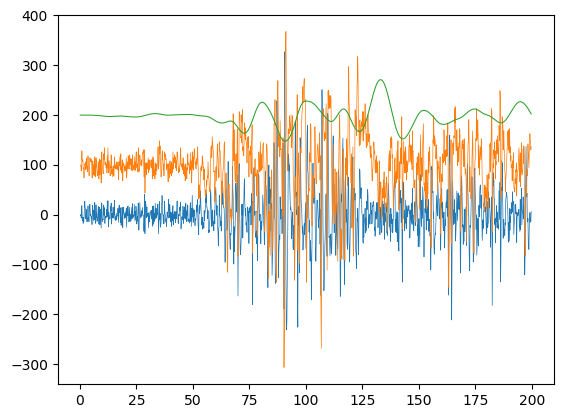

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f99b1aded50>

In [25]:
plot(tangoms, filalto, lw=0.5)
plot(tangoms, lfpex[:,1].+100, lw=0.5)
plot(tangoms, filbass.+200, lw=0.75)


In [39]:
function filtfftyeah(datostiempo::Array; bajo::Real, alto::Real,  fs=1)
    #Filtra usando fftw, a lo GUEY.
    if bajo>alto
        alto, bajo = bajo, alto
    end
    ene=length(datostiempo)
    fftdatos=fft(datostiempo)
    freiqs=FFTW.rfftfreq(ene, fs)
    bix=findfirst(x->x>=bajo, freiqs)
    aix=findfirst(x->x>alto, freiqs)
    
    if (iseven(ene))
        enemedios=div(ene,2)+1
    else 
        enemedios=div(ene,2)
    end
     
    println(freiqs[1], ", ",freiqs[end])
    println(bix, ", ", aix)
    
    for j=1:bix
        fftdatos[j]=0
        if j>2
        fftdatos[ene-j+2]=0
        end
    end

   
    for j=aix:enemedios
        fftdatos[j]=0
        fftdatos[ene-j+2]=0
    end
    
    # simetrizar (en principio es inecesario)
    #=
    if iseven(ene)
        fftdatos(enemedios)=real(fftdatos(enemedios))
    end   
    =#  
    
    result=(fftdatos,ifft(fftdatos))
    
end


filtfftyeah (generic function with 1 method)

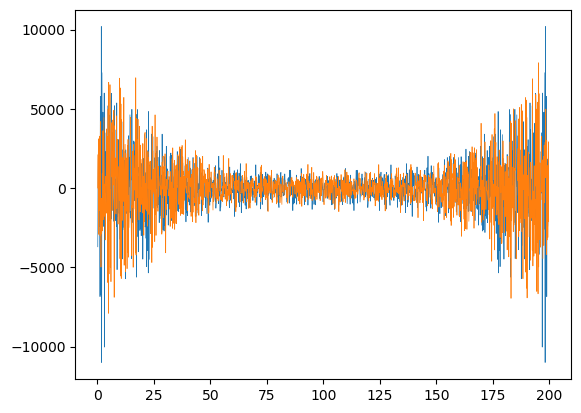

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f99b191f6d0>

In [40]:
plot(tangoms, real.(ar),lw=0.5)
plot(tangoms, imag.(ar),lw=0.5)


In [41]:
chuc,chac=filtfftyeah(lfpex[:,1], bajo=0, alto=60,fs=7022) 

0.0, 3511.0000000000005
1, 13


(Complex{Float64}[0.0 + 0.0im, 646.4710928880983 + 2110.7976969552415im, 2758.776114130329 - 2916.612825035076im, -1912.4348273476971 + 3105.744193337846im, -2423.167736596291 + 1185.8393205881152im, 1274.417799094149 - 1429.5153381214598im, 1835.477700655848 + 3276.282917607739im, -6848.995599544651 - 3015.0278966036144im, 5781.279200934585 + 4194.19176572935im, -6737.6444422763525 - 1714.8935708204133im  …  -5187.950425595949 + 4984.883500575665im, -6737.6444422763525 + 1714.8935708204147im, 5781.279200934585 - 4194.191765729351im, -6848.995599544649 + 3015.027896603614im, 1835.4777006558475 - 3276.2829176077385im, 1274.4177990941503 + 1429.515338121459im, -2423.1677365962937 - 1185.8393205881157im, -1912.4348273476962 - 3105.744193337847im, 2758.7761141303267 + 2916.6128250350775im, 646.4710928880977 - 2110.7976969552424im], Complex{Float64}[-0.8860478135153333 + 5.51405489662617e-15im, -0.6525429925765909 - 1.2203900910915273e-14im, -0.42705724631017666 + 6.588484711042299e-16im, -

In [29]:
chuch=abs2.(chuc);

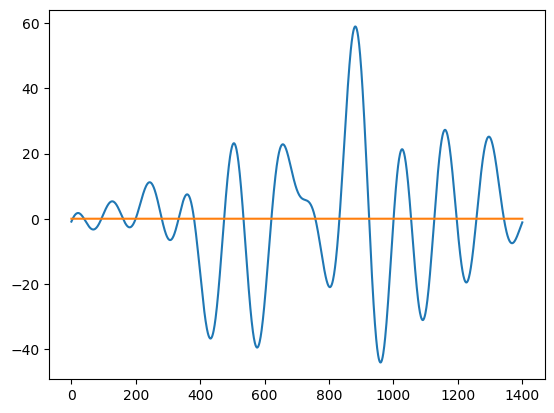

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f99b1588f50>

In [43]:
plot(real.(chac))
plot(imag.(chac))


In [31]:
chac[1:20]

20-element Array{Complex{Float64},1}:
  -0.9449497867009616 + 8.433260430134143e-15im
  -0.5936410193909548 - 6.677175851383253e-15im
  -0.4859592194958011 + 5.220107117210437e-16im
 -0.15131528065916175 + 8.412988169484782e-16im
 -0.06151270562988881 + 7.399375137016735e-16im
   0.2541167673511499 + 3.3246507464951907e-15im
  0.32385112938145694 + 4.054452129872184e-16im
   0.6184422226184517 + 5.473510375327448e-16im
   0.6662534493994131 - 2.1691318894816185e-15im
   0.9381236351440069 - 5.635688460522336e-15im
   0.9625044762616521 + 8.514349472731586e-15im
   1.2103241401661589 - 6.000589152210832e-15im
    1.210124449338273 - 6.081678194808276e-17im
   1.4329242172563328 + 8.514349472731586e-15im
   1.4073561688509322 - 1.082538718675873e-14im
   1.6045300140134455 - 6.38576210454869e-15im
   1.5531691075182206 - 3.223289443248386e-15im
   1.7244732645831748 + 6.710118274938464e-15im
   1.6472551661136676 - 3.831457262729214e-15im
   1.7928029235274585 + 8.108904259744368e-17im

In [32]:
chuch[end-19:end]

20-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.043104114317787e8
 5.176389313275269e7
 4.833671258977861e7
 5.1014433766870715e7
 5.5999133939880006e7
 1.4103008145813156e7
 3.6676548285724856e6
 7.277956773934074e6
 1.3303053963304162e7
 1.6117476019055126e7
 4.873391791411484e6

In [33]:
?ifft

search: ifft ifft! ifftshift irfft plan_ifft plan_ifft! filtfftyeah Cptrdiff_t



```
ifft(A [, dims])
```

Multidimensional inverse FFT.

A one-dimensional inverse FFT computes

$$
\operatorname{IDFT}(A)[k] = \frac{1}{\operatorname{length}(A)}
\sum_{n=1}^{\operatorname{length}(A)} \exp\left(+i\frac{2\pi (n-1)(k-1)}
{\operatorname{length}(A)} \right) A[n].
$$

A multidimensional inverse FFT simply performs this operation along each transformed dimension of `A`.


In [34]:
?fft

search: fft fft! fftfreq fftfilt FFTW fftshift fftfilt! fftintype fftouttype



```
fft(A [, dims])
```

Performs a multidimensional FFT of the array `A`. The optional `dims` argument specifies an iterable subset of dimensions (e.g. an integer, range, tuple, or array) to transform along. Most efficient if the size of `A` along the transformed dimensions is a product of small primes; see `Base.nextprod`. See also [`plan_fft()`](@ref) for even greater efficiency.

A one-dimensional FFT computes the one-dimensional discrete Fourier transform (DFT) as defined by

$$
\operatorname{DFT}(A)[k] =
  \sum_{n=1}^{\operatorname{length}(A)}
  \exp\left(-i\frac{2\pi
  (n-1)(k-1)}{\operatorname{length}(A)} \right) A[n].
$$

A multidimensional FFT simply performs this operation along each transformed dimension of `A`.

!!! note
    This performs a multidimensional FFT by default. FFT libraries in other languages such as Python and Octave perform a one-dimensional FFT along the first non-singleton dimension of the array. This is worth noting while performing comparisons.



In [35]:
ifft(fft(lfpex[:,1]))

1402-element Array{Complex{Float64},1}:
 -3.503046640209567e-14 - 1.5569096178709186e-14im
     -2.014160156250052 - 6.839860743094374e-14im
    -2.0141601562499587 + 1.832612362702227e-14im
     -12.08496093749996 - 5.222134343275373e-14im
      12.08496093749997 - 2.43267127792331e-15im
      28.19824218750001 + 2.075879490494558e-14im
      12.08496093750001 + 5.708668598860034e-14im
      6.042480468750016 + 1.2487712560006326e-14im
     10.070800781250016 + 1.41094934119552e-14im
     -8.056640624999984 + 4.2328480235865596e-14im
     -6.042480468749972 - 5.838411067015945e-15im
     -26.18408203125001 - 3.4057397890926345e-15im
    -26.184082031249986 + 1.7271966073255502e-14im
                        ⋮
 -6.227638471483674e-14 - 1.524474000831941e-14im
      42.29736328125001 + 4.3139370661840036e-14im
      22.15576171874999 - 3.048948001663882e-14im
      10.07080078124999 - 4.216630215067071e-15im
         -6.04248046875 + 3.567917874287522e-14im
     26.184082031250053 + 2.46